In [68]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib ipympl
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np


In [69]:
df_nba_data = pd.read_csv("./nba_team_stats/nba_team_stats_filtered_for_proj.csv")
df_nba_data['team'] = pd.Categorical(df_nba_data['team'])   # Overwrites 'team' column as a categorical column.


In [70]:
# analysis below
df_nba_data.describe()


,win_percentage,minutes_per_game,points_per_game,two_pointers_made_per_game,two_pointers_attempted_per_game,three_pointers_made_per_game,three_pointers_attempted_per_game,free_throws_made_per_game,free_throws_attempted_per_game,offensive_rebounds_per_game,defensive_rebounds_per_game,assists_per_game,turnovers_per_game,steals_per_game,blocks_per_game,blocks_attempted_per_game,personal_fouls_per_game,season
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.499112,48.367945,103.153024,29.795554,60.119017,8.544921,23.932365,17.927153,23.519589,10.927062,32.015471,22.856289,14.528137,7.637779,4.950106,4.954754,20.545206,13.726257
std,0.151695,0.185487,8.413722,1.935387,5.739251,3.337847,8.901671,1.877023,2.503212,1.262302,2.279423,2.754856,1.241433,0.826236,0.835766,0.699622,1.806331,7.222618
min,0.106000,48.000000,84.158537,24.158537,45.152778,2.731707,7.817073,13.469697,18.151515,7.712121,27.707317,18.024390,11.181818,5.695122,2.731707,3.158537,15.646341,3.000000
25%,0.390000,48.243902,96.792683,28.660655,55.741701,5.762195,16.287879,16.457317,21.709719,10.080562,30.174797,20.711197,13.725610,7.073171,4.378234,4.470682,19.335705,7.000000
50%,0.512000,48.365854,101.890244,29.817073,60.969697,7.792683,22.170732,17.817073,23.303030,10.829268,31.792683,22.515152,14.560976,7.597561,4.963415,4.951220,20.561644,16.000000
75%,0.606000,48.486958,110.440041,31.225610,64.756098,11.552122,31.959662,19.079084,24.932927,11.742424,33.615854,24.689024,15.239141,8.189024,5.534922,5.378049,21.753049,20.000000
max,0.890000,48.984848,123.292683,35.073171,73.231707,16.475610,45.291667,23.060976,30.158537,15.658537,42.232877,30.756098,18.463415,10.292683,8.166667,6.651515,25.207317,24.000000


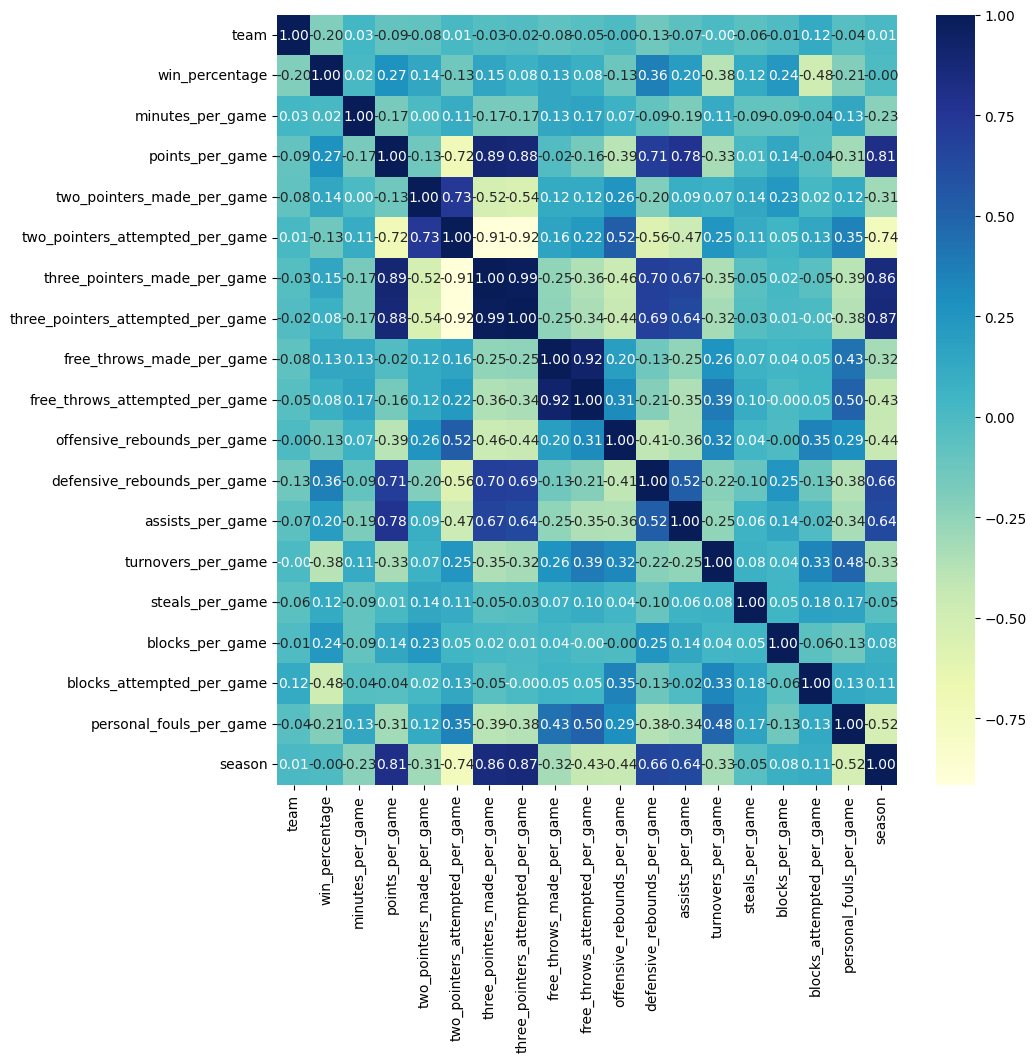

In [71]:
plt.figure(figsize=(10, 10))
p1 = sns.heatmap(df_nba_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.tight_layout
plt.show()

From the heat map, there are a few interesting trends.

The points per game and three pointers made/attempted per game are correlated with the season.
Also, points per game has a high correlation with assists per game and three pointers per game.
Three pointers made have a high inverse correlation with two pointers made. This makes sense because a team has a finite number of possessions per game. A team collectively chooses whether to try a three-point attempt versus a two-point attempt.


In [72]:

# df_nba_data.columns
df_nba_data_lm = pd.get_dummies(df_nba_data, columns=['team'])
# Define X and y for training
y = df_nba_data_lm['win_percentage']
X = df_nba_data_lm.drop(columns=['win_percentage'])


# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Fit the data
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# Use test to determine if its a good fit
print("R Score against test data: ",  lr_model.score(x_test, y_test))

R Score against test data:  0.7476781660104269


In [73]:

df_nba_data['season'] = pd.Categorical(df_nba_data['season'])   # Overwrites 'team' column as a categorical column.
df_nba_data_lm2 = pd.get_dummies(df_nba_data, columns=['team', 'season'])
# Define X and y for training
y = df_nba_data_lm2['win_percentage']
X = df_nba_data_lm2.drop(columns=['win_percentage'])


# Split the data
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=10)

# Fit the data
lr_model2 = LinearRegression()

lr_model2.fit(x_train2, y_train2)

# Use test to determine if its a good fit
print("R Score against test data: ",  lr_model2.score(x_test2, y_test2))


R Score against test data:  0.8043508385419135


As we can see, the accuracy improved quite a bit!